In [2]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200,(3,3),input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',moniter='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 40s 1s/step - loss: 1.0727 - accuracy: 0.5273 - val_loss: 0.6485 - val_accuracy: 0.6452
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 34s 1s/step - loss: 0.6584 - accuracy: 0.6045 - val_loss: 0.5643 - val_accuracy: 0.6008
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
31/31 [==============================] - 30s 970ms/step - loss: 0.5841 - accuracy: 0.6887 - val_loss: 0.4621 - val_accuracy: 0.8548
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
31/31 [==============================] - 30s 962ms/step - loss: 0.4802 - accuracy: 0.8430 - val_loss: 0.3895 - val_accuracy: 0.9113
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
31/31 [==============================] - 30s 972ms/step - loss: 0.4251 - accuracy: 0.9043 - val_loss: 0.3665 - val_accuracy: 0.9032
INFO:tensorflow:Assets written to: model-005.model\assets
E

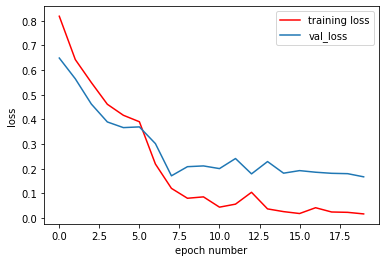

In [10]:
from matplotlib import pyplot as plt 

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

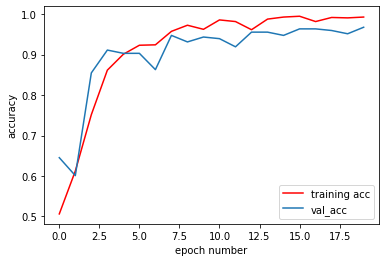

In [11]:
plt.plot(history.history['accuracy'],'r',label='training acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 247ms/step - loss: 0.1707 - accuracy: 0.9203
[0.17073562741279602, 0.9202898740768433]
